# Machine Learning Project
##### Clustering and presenting data with different unsupervised techniques 
# Table Of Content
<ul>
<li><a href="#DatasetAnalysis">Dataset analysis</a></li>
<li><a href="#DataProcessing">Data processing</a></li>
<li><a href="#ClusteringAnalysis&Validation">Clustering analysis & Cluster validation</a></li>
</ul>

# Dataset analysis
<a id='DatasetAnalysis'></a>
#### Import the pakeges

In [1]:
from sklearn.metrics import f1_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(15,10), dpi=80)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

#### • Create your own dataset from IRIS the number of samples should not be less than 100

In [2]:
all_data = pd.read_csv("../input/iris/Iris.csv")
data = all_data.sample(n = 140,random_state=1)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica


#### Split target variable from the data

In [4]:
Y=data['Species']
x=data.drop(['Species','Id'],axis=1)

In [5]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


#### EDA

In [6]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 14 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [8]:
#creating labelEncoder to Converting string labels into numbers.
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
x.shape

(140, 4)

In [10]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [11]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,140.000000,140.000000,140.000000,140.000000
mean,5.827143,3.067857,3.719286,1.192857
std,0.835700,0.441754,1.772447,0.769625
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 14 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


#### • Show the data distribution of the dataset using pdf, cdf function in stats package

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


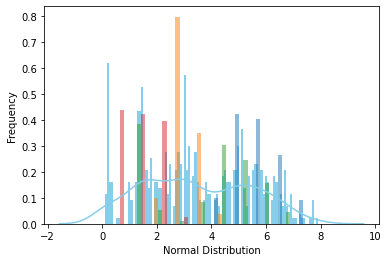

In [13]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform

ax = sns.distplot(x,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

_, bins, _ = plt.hist(x, 10, density=1, alpha=0.5)
mu, sigma = norm.fit(x)

#### PDF Function

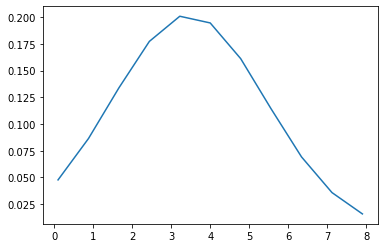

In [14]:
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

#### CDF Function

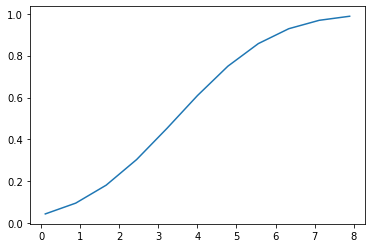

In [15]:
best_fit_line = norm.cdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

#### • The histogram of the dataset


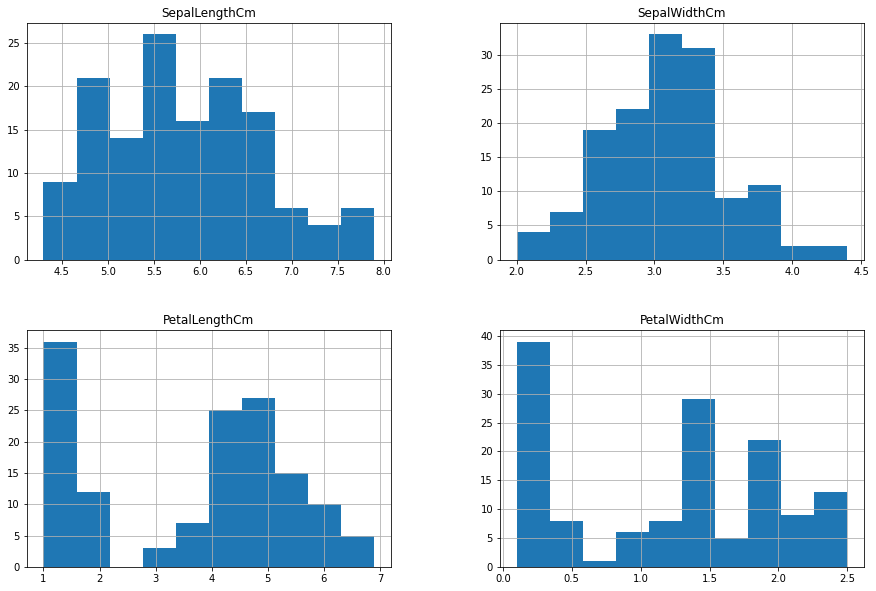

In [16]:
x.hist(figsize=(15,10));

In [17]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,140.000000,140.000000,140.000000,140.000000
mean,5.827143,3.067857,3.719286,1.192857
std,0.835700,0.441754,1.772447,0.769625
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### • Find the mean and stander division 
 

In [18]:
x.mean()

SepalLengthCm    5.827143
SepalWidthCm     3.067857
PetalLengthCm    3.719286
PetalWidthCm     1.192857
dtype: float64

In [19]:
x.std()

SepalLengthCm    0.835700
SepalWidthCm     0.441754
PetalLengthCm    1.772447
PetalWidthCm     0.769625
dtype: float64

# Data processing
<a id='DataProcessing'></a>


#### • Assess Missing Data

In [20]:
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### There is no missimg data

#### • Convert Missing Value Codes to NaNs


In [21]:
x.replace('',np.NaN)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
...,...,...,...,...
96,5.7,2.9,4.2,1.3
68,6.2,2.2,4.5,1.5
50,7.0,3.2,4.7,1.4
101,5.8,2.7,5.1,1.9


#### There is no missing values to convert it

#### • Normalize the dataset

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_norm = scaler.fit_transform(x)
names = ['SepalLengthCm','SepalWidthCm' ,'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(data_norm, columns=names)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.032596,2.117672,-1.426464,-1.294685
1,-0.873224,-1.290076,-0.407272,-0.121086
2,0.928123,-0.154160,0.385432,0.270114
3,-0.512955,1.890489,-1.369842,-1.033885
4,2.489290,1.663306,1.517868,1.052514


# Clustering analysis & Cluster Validation
<a id='ClusteringAnalysis&Validation'></a>


## • K-mean clustering


In [23]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(x)

KMeans(n_clusters=3, n_init=12)

In [24]:
k_means_labels = k_means.labels_

In [25]:
y_kmeans = k_means.predict(x)

In [26]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-0.08880806, -0.90338137,  0.3504956 ,  0.30063332],
       [ 1.14161569,  0.05787763,  0.99820575,  1.0003539 ],
       [-0.98330682,  0.83030064, -1.27901151, -1.23220191]])

####  Finding the best k using the ElbowVisualizer

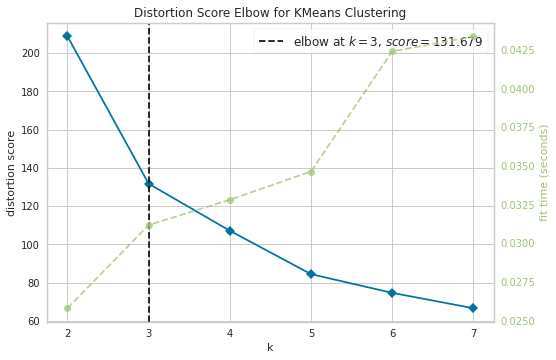

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(k_means, k=7)
model.fit(x)
model.show()

#### Display the confusion_matrix of K-means  model and the accuracy represented with 
####    F-meaures, Normalized mutual information, and Rand Statistic.

Text(124.71000000000001, 0.5, 'predicted label')

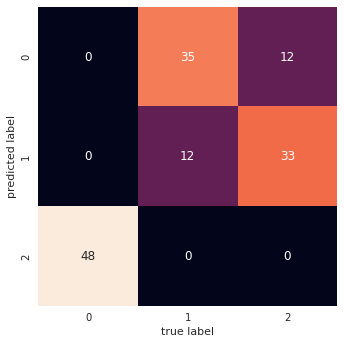

In [28]:
# confusion_matrix for K_means
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat =confusion_matrix(Y,k_means_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [29]:
#K_means validations
F1= f1_score(Y,y_kmeans,average='weighted')
print("F1_Score: ", F1)
NMI=(normalized_mutual_info_score(Y,y_kmeans))
print("Normalized Mutual Information: ",NMI)
ARS=(adjusted_rand_score(Y,y_kmeans))
print("Rand Score: ",ARS)

F1_Score:  0.08757763975155278
Normalized Mutual Information:  0.656616876434131
Rand Score:  0.6199777060556504


#### Ploting of K-means Clustring

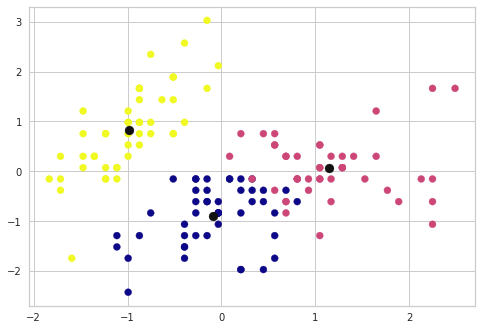

In [30]:
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c = k_means_labels, cmap= "plasma") # plotting the clusters
plt.scatter(k_means_cluster_centers[:,0] , k_means_cluster_centers[:,1] , s = 80, color = 'k')
plt.show()

## • Hierarchical clustering, using Agglomerative model with the best k


In [31]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [32]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
agglom.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=3)

#### •Display of Associated Dendrogram for the Agglomerative Hierarchical Clustering using the four-linkage type


In [33]:
dist_matrix = distance_matrix(x,x) 
print(dist_matrix)

[[0.         3.83868397 3.43740721 ... 3.42868257 4.30267673 1.47273068]
 [3.83868397 0.         2.30577    ... 2.9689664  1.84803343 2.49590428]
 [3.43740721 2.30577    0.         ... 0.68267717 1.40345605 2.77277648]
 ...
 [3.42868257 2.9689664  0.68267717 ... 0.         1.96046186 3.03848448]
 [4.30267673 1.84803343 1.40345605 ... 1.96046186 0.         3.37344133]
 [1.47273068 2.49590428 2.77277648 ... 3.03848448 3.37344133 0.        ]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


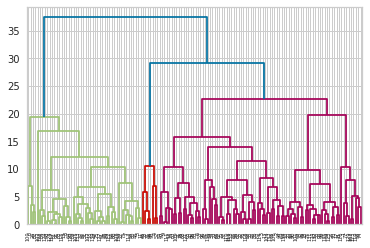

In [34]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


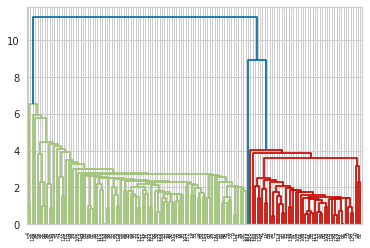

In [35]:
Z = hierarchy.linkage(dist_matrix, 'single')
dendro = hierarchy.dendrogram(Z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


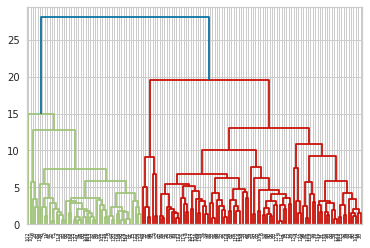

In [36]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


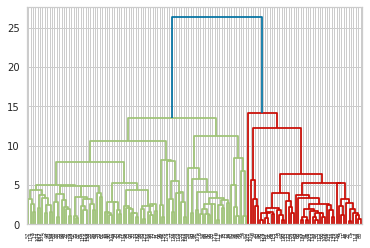

In [37]:
Z = hierarchy.linkage(dist_matrix, 'centroid')
dendro = hierarchy.dendrogram(Z)

#### Display the confusion_matrix of Agglomerative  model and the accuracy represented with 
#### F-meaures, Normalized mutual information, and Rand Statistic.

Text(91.68, 0.5, 'predicted label')

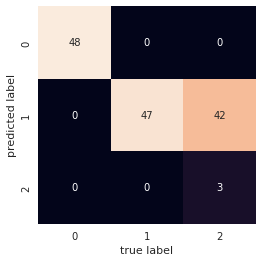

In [38]:
# confusion_matrix for hierarchical
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat =confusion_matrix(Y,agglom.labels_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [39]:
#hierarchical validations
F1= f1_score(Y,agglom.labels_,average='weighted')
print("F1_Score: ", F1)
NMI=(normalized_mutual_info_score(Y,agglom.labels_))
print("Normalized Mutual Information: ",NMI)
ARS=(adjusted_rand_score(Y,agglom.labels_))
print("Rand Score: ",ARS)

F1_Score:  0.6150735294117647
Normalized Mutual Information:  0.7176026207516613
Rand Score:  0.5738052750029129


#### Ploting of Hierarchical Clustring

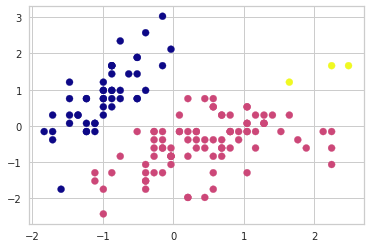

In [40]:
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c = agglom.labels_, cmap= "plasma") 
plt.show()

## • Density-Based clustering (DBSCN algorithm)


In [41]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.8, min_samples=2).fit(x)

In [42]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [43]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_clusters_

3

In [44]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(db.labels_)
unique_labels

{-1, 0, 1, 2}

#### Display the confusion_matrix of DBSCAN model and the accuracy represented with 
#### F-meaures, Normalized mutual information, and Rand Statistic.

Text(91.68, 0.5, 'predicted label')

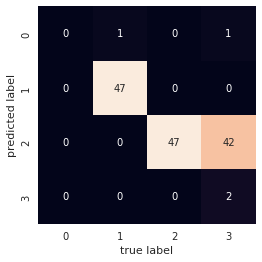

In [45]:
# confusion_matrix for DBCAN
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat =confusion_matrix(Y,db.labels_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [46]:
#DBCAN validations

F1= f1_score(Y,db.labels_,average='weighted')
print("F1_Score: ", F1)
NMI=(normalized_mutual_info_score(Y,db.labels_))
print("Normalized Mutual Information: ",NMI)
ARS=(adjusted_rand_score(Y,db.labels_))
print("Rand Score: ",ARS)

F1_Score:  0.5986415585271063
Normalized Mutual Information:  0.6923093328924673
Rand Score:  0.5621972847295409


#### Ploting of DBSCAN clustring

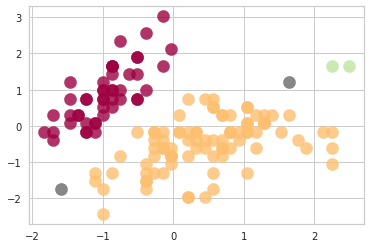

In [47]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    labelsdb = db.labels_
    class_member_mask = (labelsdb == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1],s=150, c=[col], marker=u'o', alpha=0.8)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1],s=150, c=[col] , marker=u'o', alpha=0.5)

## • Gaussian Mixture Models (GMM)

In [48]:
import numpy as np
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=3,covariance_type='full', random_state=0).fit(x)
labels = GMM.predict(x)

#### Display the confusion_matrix of Gaussian Mixture model and the accuracy represented with 
#### F-meaures, Normalized mutual information, and Rand Statistic.

Text(91.68, 0.5, 'predicted label')

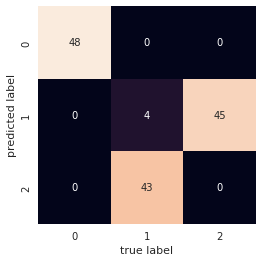

In [49]:
# confusion_matrix for Gaussian
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat =confusion_matrix(Y,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [50]:
#Gaussian validations
print("f1_Score: ", f1_score(Y,labels,average='weighted'))
print("Normalized Mutual Information: ",normalized_mutual_info_score(Y,labels))
print("Rand Score: ",adjusted_rand_score(Y,labels))

f1_Score:  0.3708333333333333
Normalized Mutual Information:  0.9104098852942716
Rand Score:  0.9180866619276756


#### Ploting of Gaussian Mixture clustring

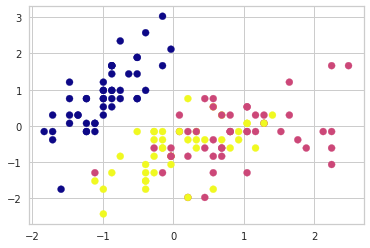

In [51]:
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c = labels, cmap= "plasma") 
plt.show()